In [1]:
import pandas as pd
import geoip2 as geo
import numpy as np
import seaborn as sns
import geoip2.database 
import matplotlib.pyplot as plt
from countryinfo import CountryInfo
import geopandas as gpd
from shapely.geometry import Point, Polygon
%matplotlib inline
import plotly.plotly as py
import plotly.tools as tls
import plotly.graph_objs as go
tls.set_credentials_file(username = 'siboraseranaj', api_key = 'IHHNxqWlSHyWAlNSNK7z')
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colors
import pycountry_convert as pc
import math


In [10]:
datafinal = pd.read_csv("/Users/siboraseranaj/Desktop/Duke/data+/OIT-Security-Analytics.csv").drop('Unnamed: 0', axis = 1)

In [11]:
datafinal.NetUserPercent.isnull().value_counts()

False    158
True      13
Name: NetUserPercent, dtype: int64

In [12]:
datafinal1 = datafinal[datafinal.isna().any(axis=1)].reset_index(drop = True)


In [13]:
datafinal2 = datafinal.dropna().reset_index(drop = True)
datafinal2


,Country,freq,Population,NetUserPercent
0,Afghanistan,4,2.602310e+07,11.447688
1,Albania,56,2.895947e+06,71.847041
2,Algeria,64,3.870000e+07,47.691055
3,Angola,11,2.438330e+07,14.339079
4,Argentina,300,4.266950e+07,75.809744
5,Armenia,59,3.009800e+06,69.718125
6,Aruba,16,1.014840e+05,97.170000
7,Australia,175,2.369690e+07,86.544721
8,Austria,20,8.527230e+06,87.935587
9,Azerbaijan,41,9.552500e+06,79.000000


In [14]:
datafinal2["AttacksPerUser"] = datafinal2.apply(lambda x: x['freq']/(x["Population"]*x["NetUserPercent"]/100), axis=1)

data_sorted = datafinal2.sort_values(by = "AttacksPerUser", ascending = False).reset_index(drop = True)


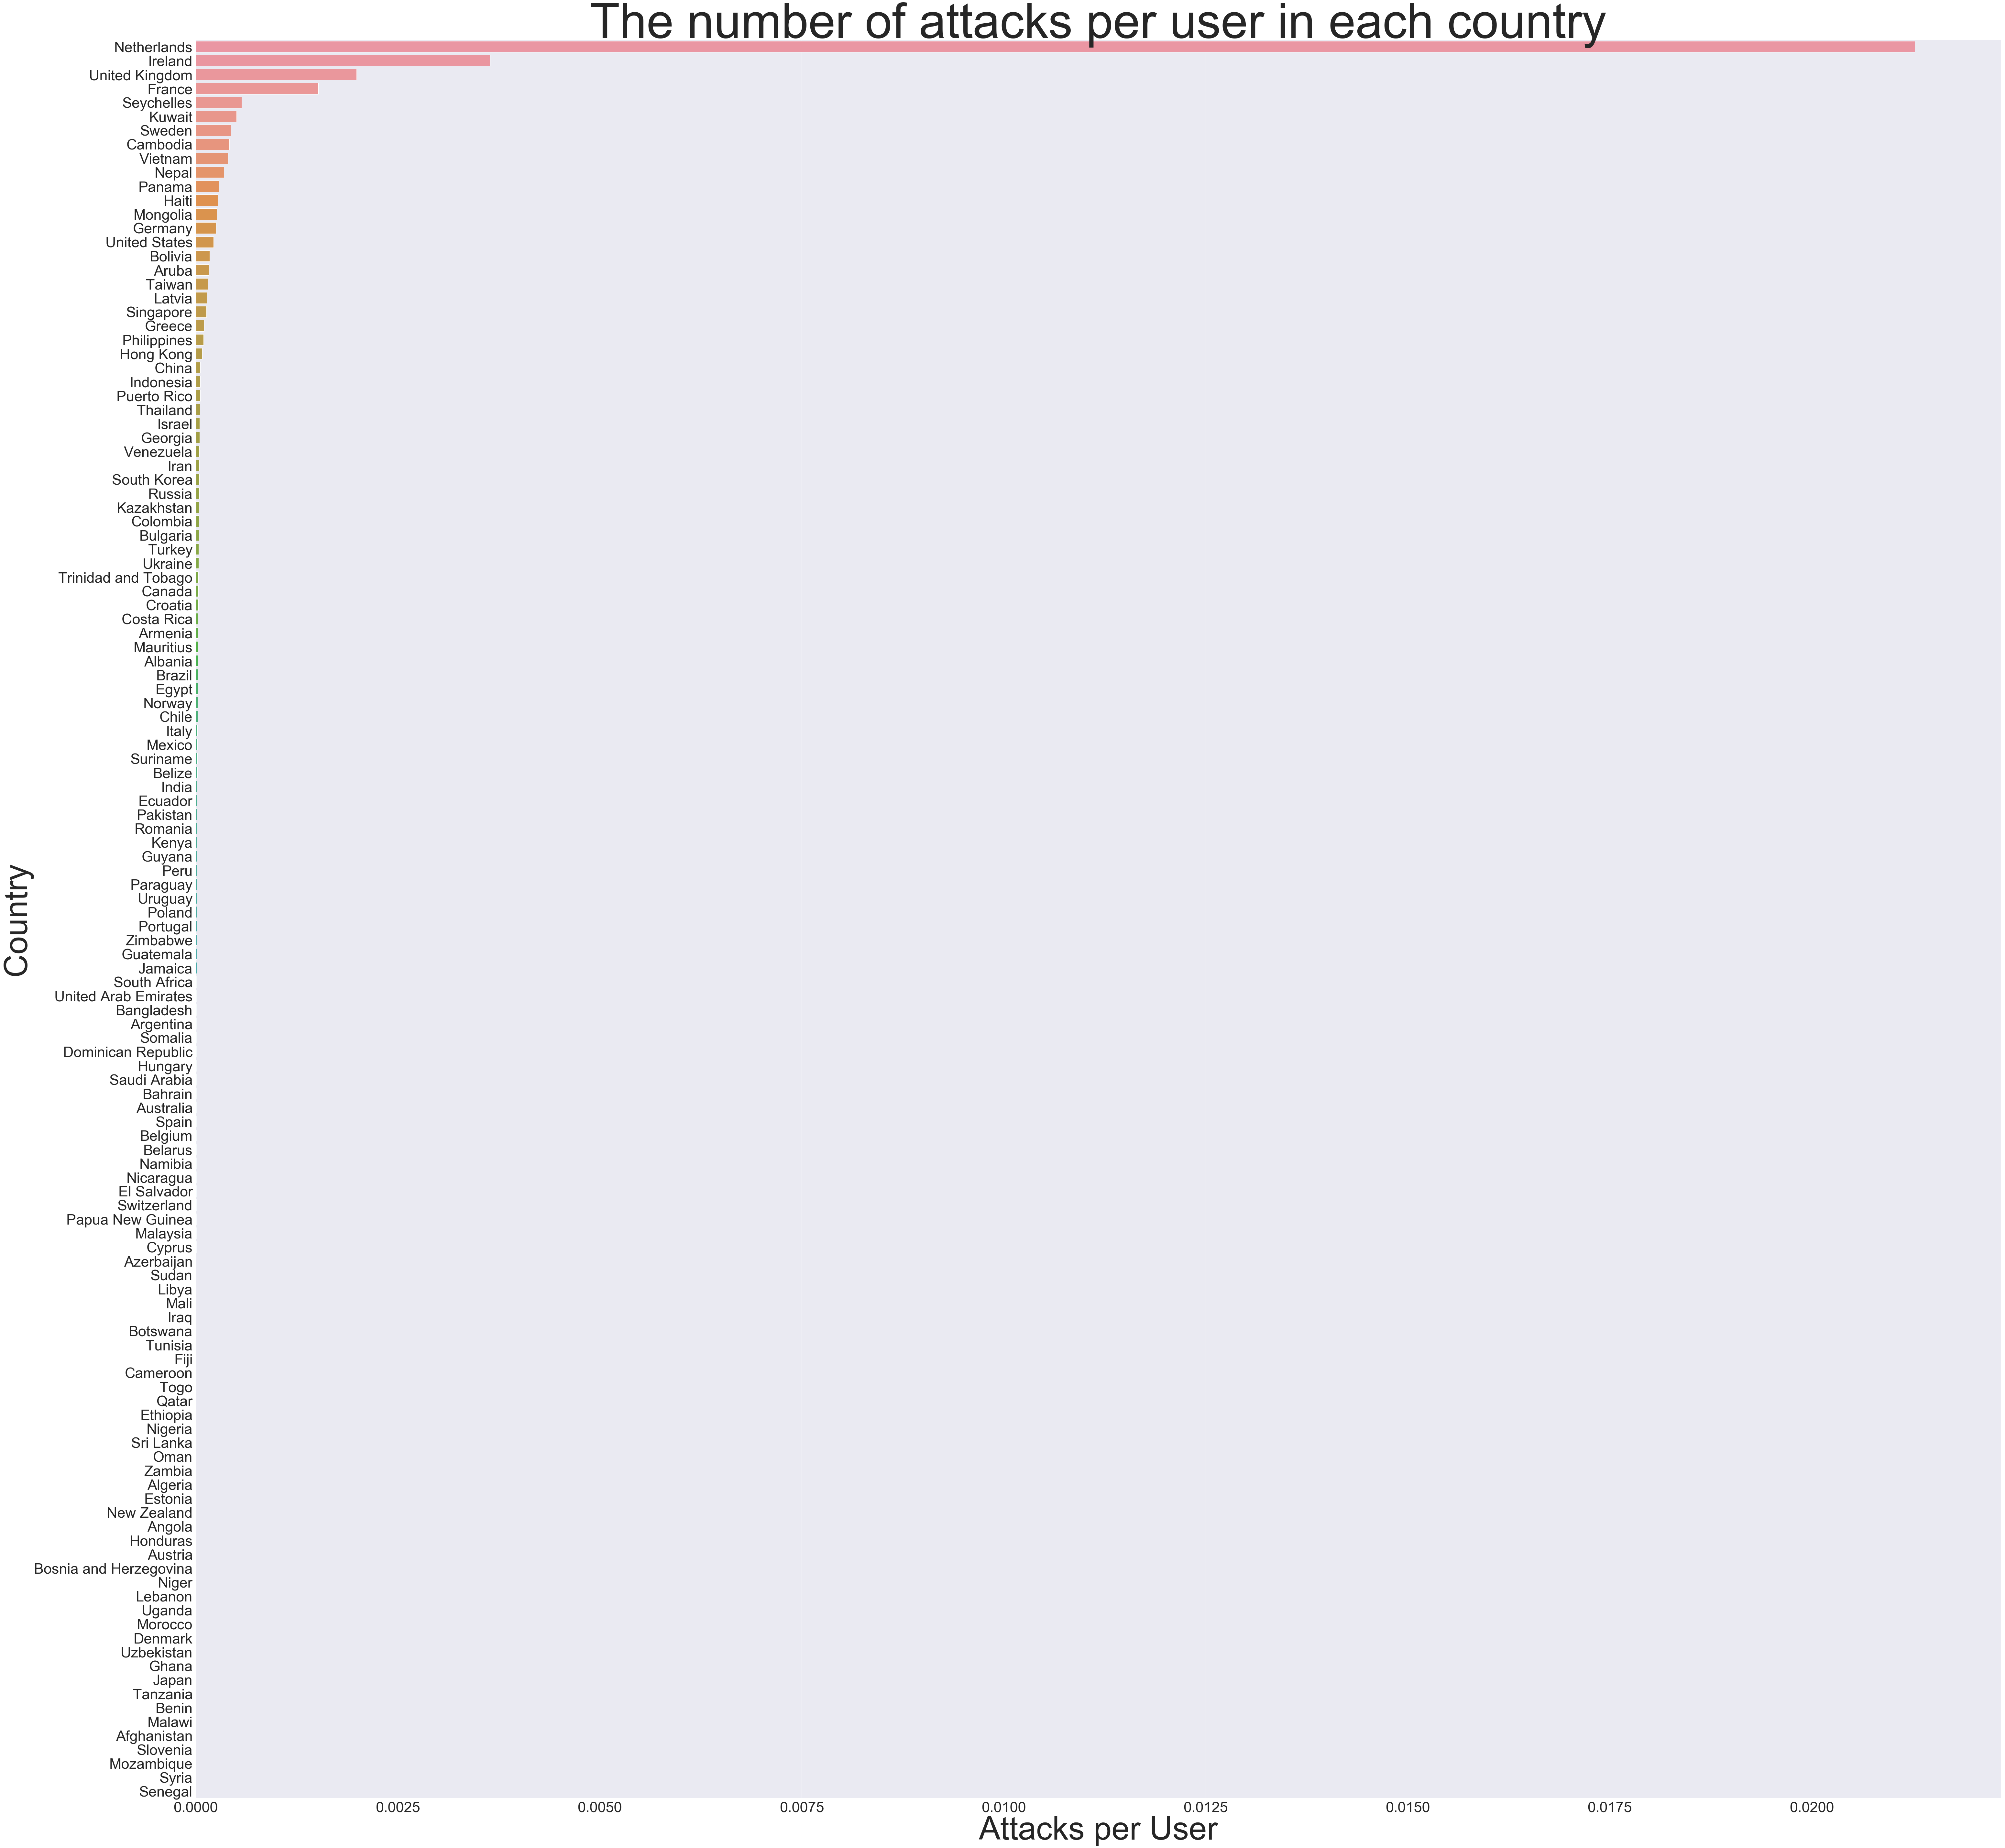

In [71]:
a = sns.barplot( x ="AttacksPerUser", y = "Country", data=data_sorted)
a.axes.set_title("The number of attacks per user in each country",fontsize=150)
a.set_xlabel("Attacks per User",fontsize=100)
a.set_ylabel("Country",fontsize=100)
a.tick_params(labelsize=45)
sns.set(rc={'figure.figsize':(100,100)})

In [16]:
dataND = data_sorted.drop([0]).reset_index(drop = True)
dataND

,Country,freq,Population,NetUserPercent,AttacksPerUser
0,Ireland,19641,6.378000e+06,84.515389,3.643706e-03
1,United Kingdom,120771,6.410565e+07,94.620000,1.991056e-03
2,France,80788,6.607800e+07,80.500000,1.518777e-03
3,Seychelles,30,8.994900e+04,58.769811,5.675062e-04
4,Kuwait,1620,3.268431e+06,97.999989,5.057660e-04
5,Sweden,4094,9.737521e+06,96.409645,4.360928e-04
6,Cambodia,2151,1.518412e+07,33.999999,4.166506e-04
7,Vietnam,17864,8.970890e+07,49.569097,4.017281e-04
8,Nepal,2051,2.764605e+07,21.403510,3.466151e-04
9,Panama,622,3.713312e+06,57.865090,2.894758e-04


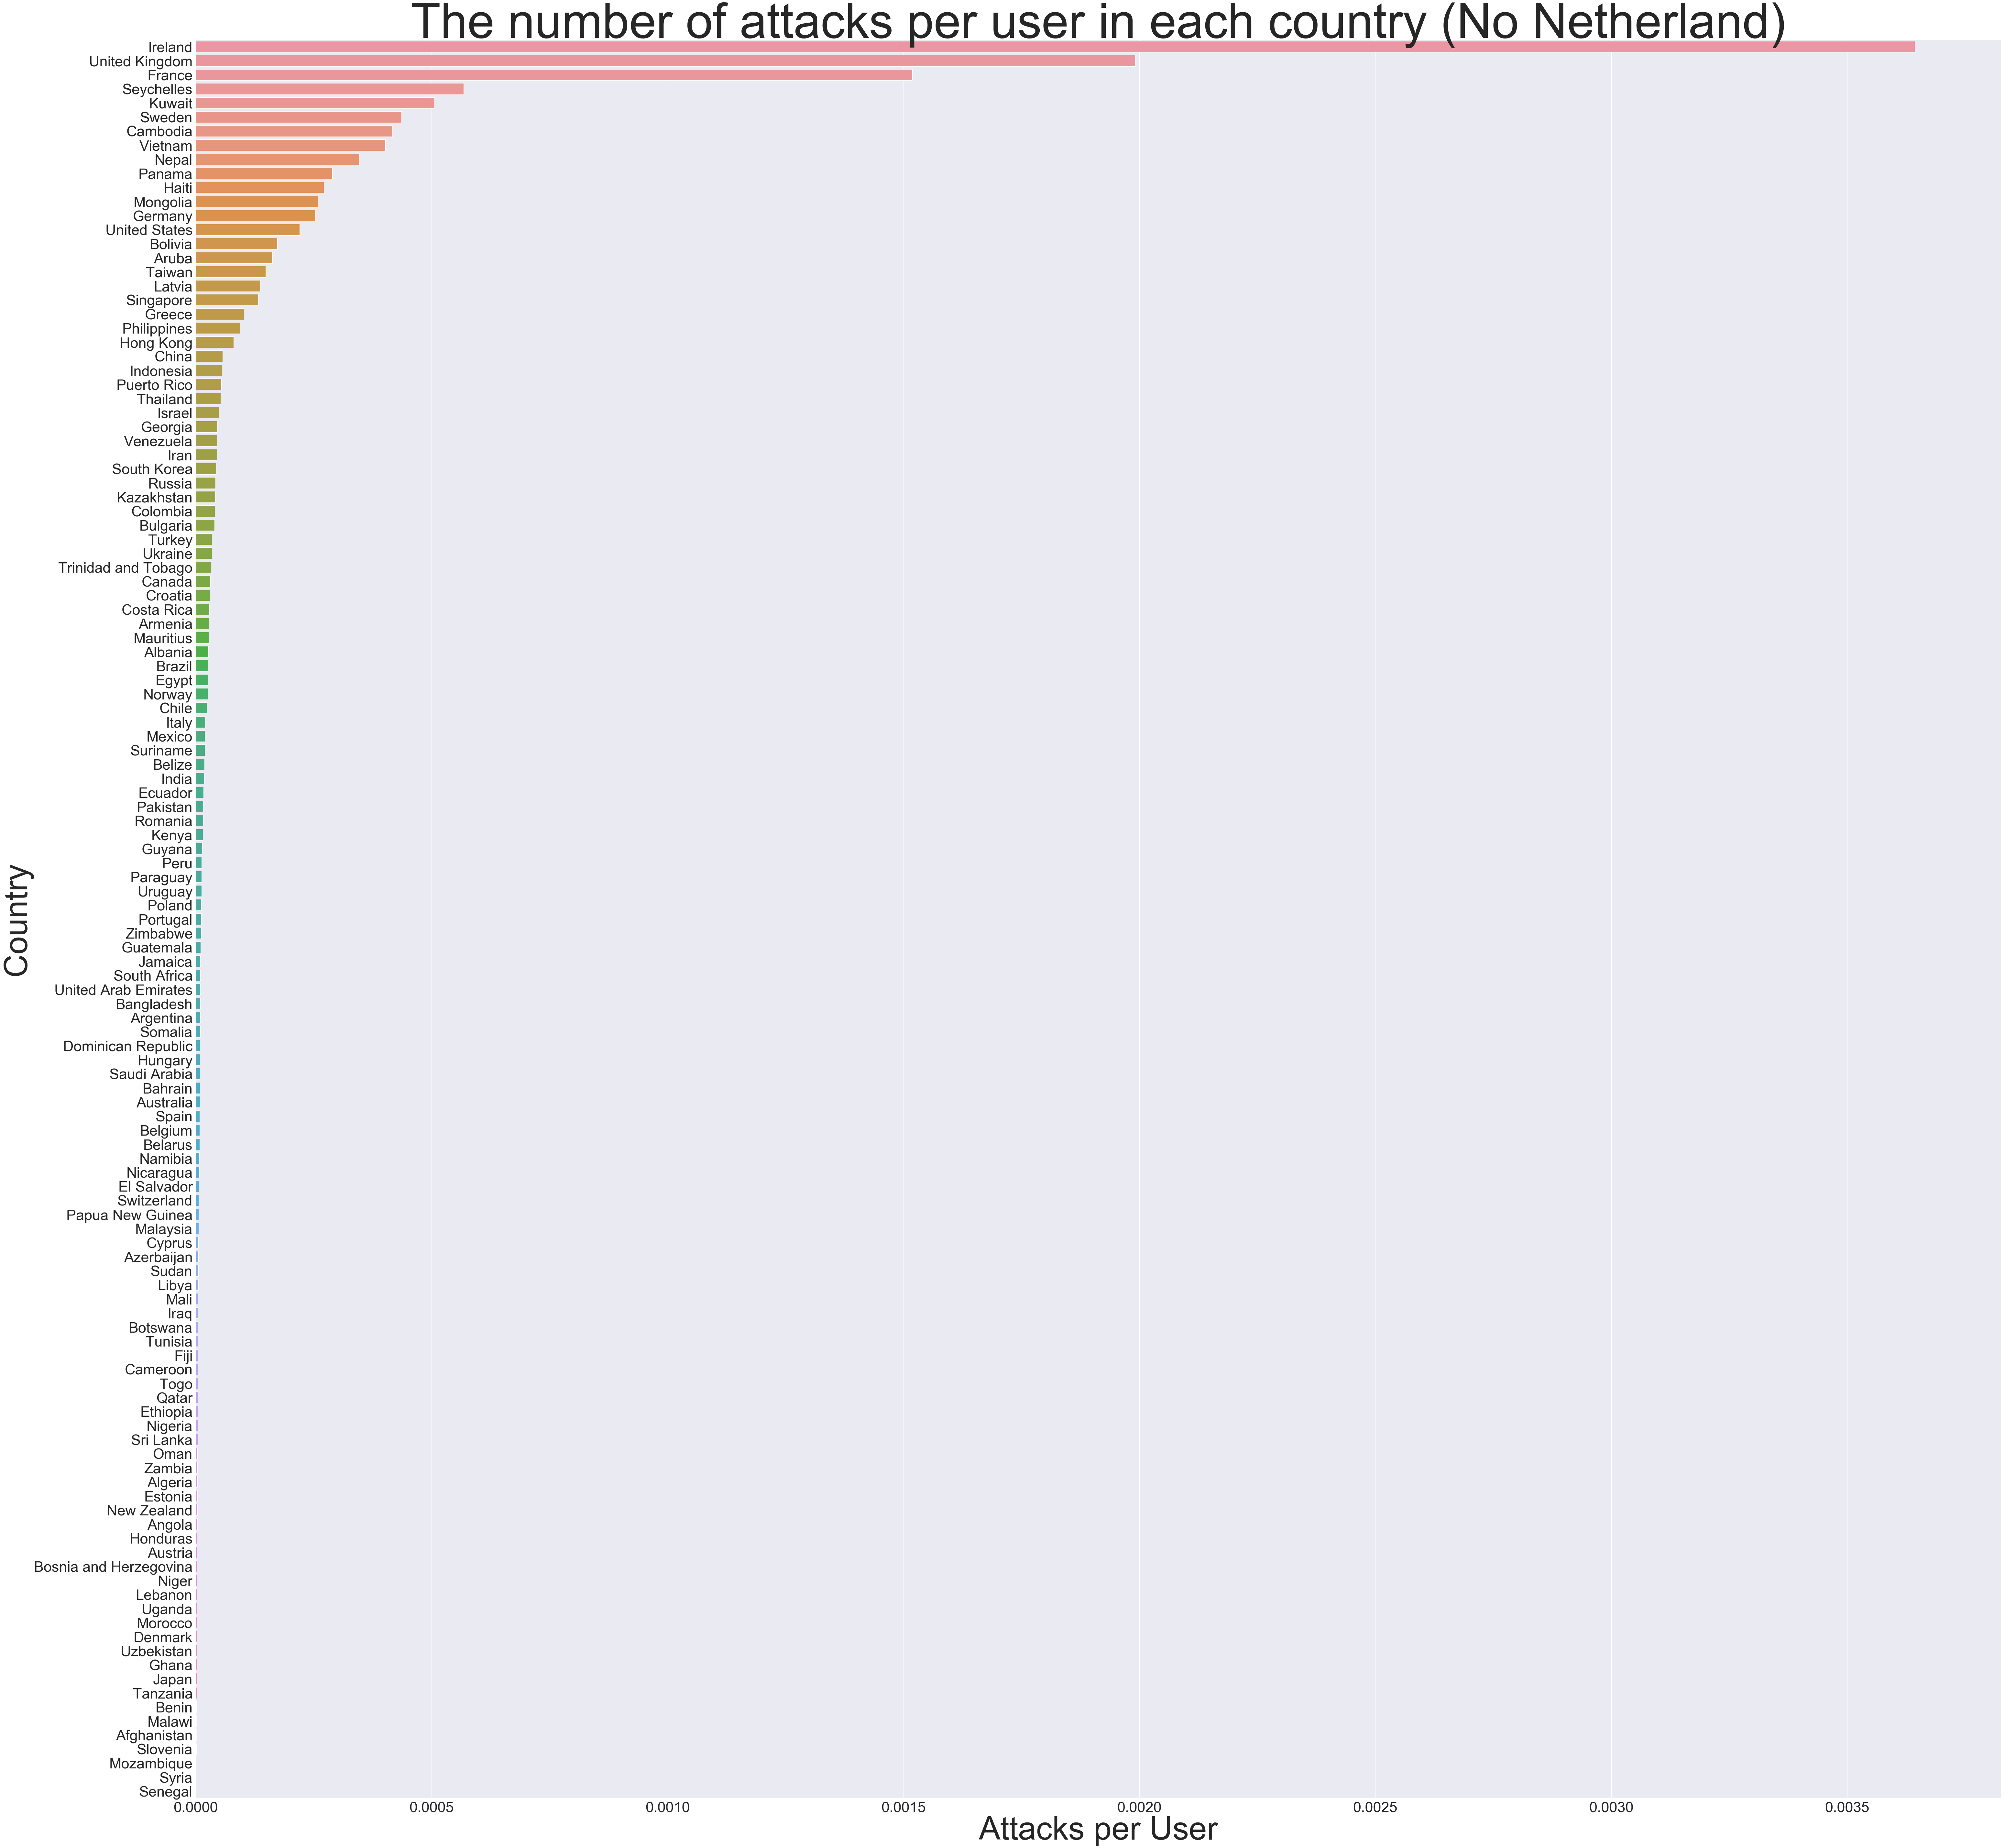

In [17]:
c = sns.barplot( x ="AttacksPerUser", y = "Country", data=dataND)
c.axes.set_title("The number of attacks per user in each country (No Netherland)",fontsize=150)
c.set_xlabel("Attacks per User",fontsize=100)
c.set_ylabel("Country",fontsize=100)
c.tick_params(labelsize=45)
sns.set(rc={'figure.figsize':(100,100)})

In [18]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


In [19]:
# changing index cols with rename() 


In [20]:
#plot_data_world = world.set_index("name", drop = False).join(datafinal2.set_index("Country"))

In [72]:
plot_data_world = datafinal2.drop_duplicates("Country").reset_index(drop = True)

In [22]:
plot_data_world.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 5 columns):
Country           126 non-null object
freq              126 non-null int64
Population        126 non-null float64
NetUserPercent    126 non-null float64
AttacksPerUser    126 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 5.0+ KB


In [23]:
#fig, ax = plt.subplots(1, figsize= (18,7))
#cmap = mpl.cm.get_cmap("cividis")
#cmap.set_under('red')

#datanona.plot(column = "AttacksPerUser", cmap = cmap, linewidth= 0.8, ax = ax, vmin = 1.481593e-05, edgecolor="0.8", legend = False)
#ax.axis("off")
#ax.set_title("Attacks per user in each country", fontdict = {"fontsize": "10", "fontweight": "1"})

#scatter = ax.collections[0]
#plt.colorbar(scatter, ax=ax, extend='min')







In [99]:
def get_continet(row):
    return pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(row['Country'],cn_name_format="default"))

plot_data_world['Continent'] = plot_data_world.apply(get_continet,axis = 1)

#pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2('Brazil',cn_name_format="default"))
plot_data_world



,Country,freq,Population,NetUserPercent,AttacksPerUser,Continent,text
0,Afghanistan,4,2.602310e+07,11.447688,1.342713e-06,AS,Number of Attacks per user in Afghanistan is 1...
1,Albania,56,2.895947e+06,71.847041,2.691464e-05,EU,Number of Attacks per user in Albania is 2.691...
2,Algeria,64,3.870000e+07,47.691055,3.467625e-06,AF,Number of Attacks per user in Algeria is 3.467...
3,Angola,11,2.438330e+07,14.339079,3.146146e-06,AF,Number of Attacks per user in Angola is 3.1461...
4,Argentina,300,4.266950e+07,75.809744,9.274247e-06,SA,Number of Attacks per user in Argentina is 9.2...
5,Armenia,59,3.009800e+06,69.718125,2.811698e-05,AS,Number of Attacks per user in Armenia is 2.811...
6,Aruba,16,1.014840e+05,97.170000,1.622521e-04,NA,Number of Attacks per user in Aruba is 0.00016...
7,Australia,175,2.369690e+07,86.544721,8.533082e-06,OC,Number of Attacks per user in Australia is 8.5...
8,Austria,20,8.527230e+06,87.935587,2.667211e-06,EU,Number of Attacks per user in Austria is 2.667...
9,Azerbaijan,41,9.552500e+06,79.000000,5.433000e-06,AS,Number of Attacks per user in Azerbaijan is 5....


In [98]:
#datafinal2.rename(index = {"United States": "United States of America"}, 
                                 # inplace = True) 
#datafinal2.replace({"Country": "United States"}, "United States of America", inplace = True )

def f(row):
    if math.isnan(row["AttacksPerUser"]):
        return "There is no data provided for " + row["Country"]
    else: 
        return 'Number of Attacks per user ' + 'in' + " " + row['Country'] + ' is ' + str(row['AttacksPerUser'])

dt.apply(f, axis = 1)   
plot_data_world['text'] = plot_data_world.apply(f, axis = 1) 

In [100]:
dt = plot_data_world  

data = [dict(type = 'choropleth',autocolorscale = False, locations = dt['Country'],zmin = 0, zmax = 5.1e-05, z = dt['AttacksPerUser'],
            locationmode = 'country names', text = dt['text'],colorscale = 'Bluered',
            colorbar = dict(title = "Number of Attacks per User in each Country"))]

layout = dict(title = "Number of Attacks per User in each Country (World)", geo = dict(scope = 'world', projection = go.layout.geo.Projection(type = 'equirectangular'), showcountries = True))

#fig = go.Figure(data = data,layout = layout)
go.FigureWidget(data = data,layout = layout)





FigureWidget({
    'data': [{'autocolorscale': False,
              'colorbar': {'title': {'text': 'Number of …

In [76]:
dt.describe()

,freq,Population,NetUserPercent,AttacksPerUser
count,126.000000,1.260000e+02,126.000000,1.260000e+02
mean,5964.888889,5.350108e+07,57.696388,2.773770e-04
std,32797.576068,1.689639e+08,26.711510,1.927124e-03
min,2.000000,8.994900e+04,2.004049,4.994500e-07
25%,13.000000,5.234762e+06,34.147511,4.683475e-06
50%,84.500000,1.426602e+07,61.188449,1.153675e-05
75%,619.500000,3.819435e+07,80.174347,4.269549e-05
max,334712.000000,1.367110e+09,97.999989,2.127502e-02


In [77]:
dt.sort_values(by = "AttacksPerUser", ascending = False).reset_index(drop = True)

,Country,freq,Population,NetUserPercent,AttacksPerUser,Continent
0,Netherlands,334712,1.688100e+07,93.197279,2.127502e-02,EU
1,Ireland,19641,6.378000e+06,84.515389,3.643706e-03,EU
2,United Kingdom,120771,6.410565e+07,94.620000,1.991056e-03,EU
3,France,80788,6.607800e+07,80.500000,1.518777e-03,EU
4,Seychelles,30,8.994900e+04,58.769811,5.675062e-04,AF
5,Kuwait,1620,3.268431e+06,97.999989,5.057660e-04,AS
6,Sweden,4094,9.737521e+06,96.409645,4.360928e-04,EU
7,Cambodia,2151,1.518412e+07,33.999999,4.166506e-04,AS
8,Vietnam,17864,8.970890e+07,49.569097,4.017281e-04,AS
9,Nepal,2051,2.764605e+07,21.403510,3.466151e-04,AS


In [101]:
plot_data_world  

,Country,freq,Population,NetUserPercent,AttacksPerUser,Continent,text
0,Afghanistan,4,2.602310e+07,11.447688,1.342713e-06,AS,Number of Attacks per user in Afghanistan is 1...
1,Albania,56,2.895947e+06,71.847041,2.691464e-05,EU,Number of Attacks per user in Albania is 2.691...
2,Algeria,64,3.870000e+07,47.691055,3.467625e-06,AF,Number of Attacks per user in Algeria is 3.467...
3,Angola,11,2.438330e+07,14.339079,3.146146e-06,AF,Number of Attacks per user in Angola is 3.1461...
4,Argentina,300,4.266950e+07,75.809744,9.274247e-06,SA,Number of Attacks per user in Argentina is 9.2...
5,Armenia,59,3.009800e+06,69.718125,2.811698e-05,AS,Number of Attacks per user in Armenia is 2.811...
6,Aruba,16,1.014840e+05,97.170000,1.622521e-04,NA,Number of Attacks per user in Aruba is 0.00016...
7,Australia,175,2.369690e+07,86.544721,8.533082e-06,OC,Number of Attacks per user in Australia is 8.5...
8,Austria,20,8.527230e+06,87.935587,2.667211e-06,EU,Number of Attacks per user in Austria is 2.667...
9,Azerbaijan,41,9.552500e+06,79.000000,5.433000e-06,AS,Number of Attacks per user in Azerbaijan is 5....


In [103]:
europe = plot_data_world[plot_data_world["Continent"] == "EU"].reset_index(drop = True)



In [104]:
import math

dt1 = europe 

data1 = [dict(type = 'choropleth',autocolorscale = False, locations = dt1['Country'], zmax = 0.000075,zmin = 0, z = dt1['AttacksPerUser'],
            locationmode = 'country names', text = dt1['text'],colorscale = [
[0, 'rgb(255,255,204)'], 
[0.125, 'rgb(255,255,204)'],
#[0.125, 'rgb(255,204,153)'], 
[0.25, 'rgb(255,204,153)'],
#[0.25, 'rgb(255,100,0)'], 
[0.5, 'rgb(255,100,0)'],
#[0.5, 'rgb(220,0,0)'],
[0.72, 'rgb(220,0,0)'],                
#[0.80, "rgb(100,0,0)"],
#[0.90, "rgb(170,0,0)"],
#[0.90, "rgb(100,0,0)"],
[1, "rgb(100,0,0)"]], 

colorbar = dict(title = "Number of Attacks per User in each Country", tickvals = [0.000005,0.000014,0.000028, 0.000050, 0.000071], ticktext = ["Very Low","Low", "Moderate", "High","Very High"]))]

layout1 = dict(title = "Number of Attacks per User in each Country (Europe)", geo = dict(scope = 'europe', projection = go.layout.geo.Projection(type = 'equirectangular'), showcountries = True))

#fig1 = go.Figure(data = data1,layout = layout1)
#py.plot(fig)
go.FigureWidget(data = data1,layout = layout1)

FigureWidget({
    'data': [{'autocolorscale': False,
              'colorbar': {'ticktext': [Very Low, Low, M…

In [105]:
asia = plot_data_world[plot_data_world["Continent"] == "AS"].reset_index(drop = True)

In [106]:
dt2 = asia 
  
data2 = [dict(type = 'choropleth',autocolorscale = False, locations = dt2['Country'], z = dt2['AttacksPerUser'],zmin = 0,zmax = 0.00022,
            locationmode = 'country names', text = dt2['text'],colorscale = [
[0, 'rgb(255,255,204)'], 
[0.040742121850816385, 'rgb(255,255,204)'],
#[0.060742121850816385, 'rgb(255,204,153)'], 
[0.12497886374331212, 'rgb(255,204,153)'],
#[0.13497886374331212, 'rgb(255,100,0)'], 
[0.178008229102, 'rgb(255,100,0)'],
#[0.198008229102, 'rgb(220,0,0)'],
[0.23, 'rgb(220,0,0)'],                
#[0.50, "rgb(100,0,0)"],
[1, "rgb(100,0,0)"]],

colorbar = dict(title = "Number of Attacks per User in each Country", tickvals = [0.000014,0.000032,0.000051, 0.000090, 0.00016], ticktext = ["Very Low","Low", "Moderate", "High","Very High"]))]

layout2 = dict(title = "Number of Attacks per User in each Country (Asia)", geo = dict(scope = 'asia', projection = go.layout.geo.Projection(type = 'equirectangular'),
                                                                               showcountries= True))

#fig2 = go.Figure(data = data2,layout = layout2)
#py.plot(fig2)
go.FigureWidget(data = data2,layout = layout2)

FigureWidget({
    'data': [{'autocolorscale': False,
              'colorbar': {'ticktext': [Very Low, Low, M…

In [107]:
africa = plot_data_world[plot_data_world["Continent"] == "AF"]

In [108]:
dt3 = africa 
  
data3 = [dict(type = 'choropleth',autocolorscale = False, locations = dt3['Country'], z = dt3['AttacksPerUser'],zmin = 0,zmax = 1e-05,
            locationmode = 'country names', text = dt3['text'],colorscale = [
[0, 'rgb(255,255,204)'], 
[0.22343630872815487, 'rgb(255,255,204)'],
#[0.22343630872815487, 'rgb(255,204,153)'], 
[0.47, 'rgb(255,204,153)'],
#[0.47, 'rgb(255,100,0)'], 
[0.66, 'rgb(255,100,0)'],
#[0.66, 'rgb(220,0,0)'],
[0.80, 'rgb(220,0,0)'],                
#[0.80, "rgb(100,0,0)"],
[1, "rgb(100,0,0)"]],

colorbar = dict(title = "Number of Attacks per User in each Country", tickvals = [0.000001,0.0000035,0.0000057, 0.0000073, 0.000009], ticktext = ["Very Low","Low", "Moderate", "High","Very High"]))]

layout3 = dict(title = "Number of Attacks per User in each Country (Africa)", geo = dict(scope = 'africa', projection = go.layout.geo.Projection(type = 'equirectangular'), #showlakes = True, lakecolor = 'rgb(66,165,245)',
                                                                               showcountries= True))

#fig2 = go.Figure(data = data2,layout = layout2)
#py.plot(fig2)
go.FigureWidget(data = data3,layout = layout3)

FigureWidget({
    'data': [{'autocolorscale': False,
              'colorbar': {'ticktext': [Very Low, Low, M…

In [109]:
#dt3.describe()

In [110]:
#dt3.sort_values(by = "AttacksPerUser", ascending = False).reset_index(drop = True)

In [111]:
North_America = plot_data_world[plot_data_world["Continent"] == "NA"]

In [112]:
dt4 = North_America
  
data4 = [dict(type = 'choropleth',autocolorscale = False, locations = dt4['Country'], z = dt4['AttacksPerUser'],zmin = 0,zmax = 0.000162,
            locationmode = 'country names', text = dt4['text'],colorscale = [
[0, 'rgb(255,255,204)'], 
[0.08, 'rgb(255,255,204)'],
#[0.08, 'rgb(255,204,153)'], 
[0.14, 'rgb(255,204,153)'],
#[0.14, 'rgb(255,100,0)'], 
[0.25, 'rgb(255,100,0)'],
#[0.40, 'rgb(220,0,0)'],
[0.70, 'rgb(220,0,0)'],                
#[0.70, "rgb(100,0,0)"],
[1, "rgb(100,0,0)"]],

colorbar = dict(title = "Number of Attacks per User in each Country", tickvals = [0.000007,0.000029,0.000052, 0.0000900, 0.00014], ticktext = ["Very Low","Low", "Moderate", "High","Very High"]))]

layout4 = dict(title = "Number of Attacks per User in each Country (North America)", geo = dict(scope = 'north america', projection = go.layout.geo.Projection(type = 'equirectangular'), #showlakes = True, lakecolor = 'rgb(66,165,245)',
                                                                               showcountries= True))

#fig2 = go.Figure(data = data2,layout = layout2)
#py.plot(fig2)
go.FigureWidget(data = data4,layout = layout4)

FigureWidget({
    'data': [{'autocolorscale': False,
              'colorbar': {'ticktext': [Very Low, Low, M…

In [113]:
#dt4.describe()

In [114]:
#dt4.sort_values(by = "AttacksPerUser", ascending = False).reset_index(drop = True)

In [115]:
South_America = plot_data_world[plot_data_world["Continent"] == "SA"]

In [116]:
dt5 = South_America
  
data5 = [dict(type = 'choropleth',autocolorscale = False, locations = dt5['Country'], z = dt5['AttacksPerUser'],zmin = 0,zmax = 0.0001,
            locationmode = 'country names', text = dt5['text'],colorscale = [
[0, 'rgb(255,255,204)'], 
[0.12, 'rgb(255,255,204)'],
#[0.12, 'rgb(255,204,153)'], 
[0.18, 'rgb(255,204,153)'],
#[0.22, 'rgb(255,100,0)'], 
[0.29, 'rgb(255,100,0)'],
#[0.23, 'rgb(220,0,0)'],
[0.70, 'rgb(220,0,0)'],                
#[0.70, "rgb(100,0,0)"],
[1, "rgb(100,0,0)"]],

colorbar = dict(title = "Number of Attacks per User in each Country", tickvals = [0.000005,0.000018,0.000037, 0.000055, 0.000085], ticktext = ["Very Low","Low", "Moderate", "High","Very High"]))]

layout5 = dict(title = "Number of Attacks per User in each Country (South America)", geo = dict(scope = 'south america', projection = go.layout.geo.Projection(type = 'equirectangular'), #showlakes = True, lakecolor = 'rgb(66,165,245)',
                                                                               showcountries= True))

#fig2 = go.Figure(data = data2,layout = layout2)
#py.plot(fig2)
go.FigureWidget(data = data5,layout = layout5)

FigureWidget({
    'data': [{'autocolorscale': False,
              'colorbar': {'ticktext': [Very Low, Low, M…

In [117]:
#dt5.describe()

In [118]:
#dt5.sort_values(by = "AttacksPerUser", ascending = False).reset_index(drop = True)

In [119]:
#pd.DataFrame(plot_data_world['Continent'].value_counts())

In [120]:
Oceania = plot_data_world[plot_data_world["Continent"] == "OC"]

In [121]:
dt6 = Oceania
  
data6 = [dict(type = 'choropleth',autocolorscale = False, locations = dt6['Country'], z = dt5['AttacksPerUser'],zmin = 0,zmax = 0.0001,
            locationmode = 'country names', text = dt6['text'],colorscale = [
[0, 'rgb(255,255,204)'], 
[0.12, 'rgb(255,255,204)'],
#[0.12, 'rgb(255,204,153)'], 
[0.25, 'rgb(255,204,153)'],
#[0.25, 'rgb(255,100,0)'], 
[0.40, 'rgb(255,100,0)'],
#[0.40, 'rgb(220,0,0)'],
[0.70, 'rgb(220,0,0)'],                
#[0.70, "rgb(100,0,0)"],
[1, "rgb(100,0,0)"]],

colorbar = dict(title = "Number of Attacks per User in each Country", tickvals = [0.000007,0.0000195,0.000035, 0.000055, 0.000085], ticktext = ["Very Low","Low", "Moderate", "High","Very High"]))]

layout6 = dict(title = "Number of Attacks per User in each Country (Oceania)", geo = dict(scope = 'world', projection = go.layout.geo.Projection(type = 'equirectangular'), #showlakes = True, lakecolor = 'rgb(66,165,245)',
                                                                               showcountries= True))

#fig2 = go.Figure(data = data2,layout = layout2)
#py.plot(fig2)
go.FigureWidget(data = data6,layout = layout6)

FigureWidget({
    'data': [{'autocolorscale': False,
              'colorbar': {'ticktext': [Very Low, Low, M…

In [122]:
# Import dataset to run regression
#gender = pd.read_csv("/Users/siboraseranaj/Desktop/Duke/data+/Security-Analytics/gender-gap1.csv", sep='delimiter', header=None , engine='python')

# file = open('/Users/siboraseranaj/Desktop/Duke/data+/Security-Analytics/' + filename, 'r', encoding="ISO-8859-1")

In [91]:
extradata = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
extradata


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"(POLYGON ((180 -16.06713266364245, 180 -16.555..."
1,53950935,Africa,Tanzania,TZA,150600.0,POLYGON ((33.90371119710453 -0.950000000000000...
2,603253,Africa,W. Sahara,ESH,906.5,POLYGON ((-8.665589565454809 27.65642588959236...
3,35623680,North America,Canada,CAN,1674000.0,"(POLYGON ((-122.84 49.00000000000011, -122.974..."
4,326625791,North America,United States of America,USA,18560000.0,"(POLYGON ((-122.84 49.00000000000011, -120 49...."
5,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997033076265 49.21498078062912,..."
6,29748859,Asia,Uzbekistan,UZB,202300.0,"POLYGON ((55.96819135928291 41.30864166926936,..."
7,6909701,Oceania,Papua New Guinea,PNG,28020.0,(POLYGON ((141.0002104025918 -2.60015105551566...
8,260580739,Asia,Indonesia,IDN,3028000.0,(POLYGON ((141.0002104025918 -2.60015105551566...
9,44293293,South America,Argentina,ARG,879400.0,(POLYGON ((-68.63401022758323 -52.636370458874...


In [123]:
datafinal2.replace({"Country": "United States"}, "United States of America", inplace = True )
full = extradata.set_index("name", drop = False).join(datafinal2.set_index("Country"))
full

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,freq,Population,NetUserPercent,AttacksPerUser
Afghanistan,34124811,Asia,Afghanistan,AFG,64080.0,"POLYGON ((66.51860680528867 37.36278432875879,...",4.0,26023100.0,11.447688,0.000001
Albania,3047987,Europe,Albania,ALB,33900.0,"POLYGON ((21.0200403174764 40.84272695572588, ...",56.0,2895947.0,71.847041,0.000027
Algeria,40969443,Africa,Algeria,DZA,609400.0,POLYGON ((-8.684399786809053 27.39574412689601...,64.0,38700000.0,47.691055,0.000003
Angola,29310273,Africa,Angola,AGO,189000.0,(POLYGON ((12.99551720546518 -4.78110320396188...,11.0,24383301.0,14.339079,0.000003
Antarctica,4050,Antarctica,Antarctica,ATA,810.0,(POLYGON ((-48.66061601418252 -78.047018731598...,NaN,NaN,NaN,NaN
Argentina,44293293,South America,Argentina,ARG,879400.0,(POLYGON ((-68.63401022758323 -52.636370458874...,300.0,42669500.0,75.809744,0.000009
Armenia,3045191,Asia,Armenia,ARM,26300.0,"POLYGON ((46.50571984231797 38.77060537368629,...",59.0,3009800.0,69.718125,0.000028
Australia,23232413,Oceania,Australia,AUS,1189000.0,(POLYGON ((147.6892594748842 -40.8082581520226...,175.0,23696900.0,86.544721,0.000009
Austria,8754413,Europe,Austria,AUT,416600.0,"POLYGON ((16.97966678230404 48.12349701597631,...",20.0,8527230.0,87.935587,0.000003
Azerbaijan,9961396,Asia,Azerbaijan,AZE,167900.0,(POLYGON ((46.40495079934882 41.86067515722731...,41.0,9552500.0,79.000000,0.000005
